# SVM Classification Project

Welcome to SVM Classification Project! Go ahead and just follow the directions below.

classify tumors into malignant (cancer) or benign using features obtained from several cell images.

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

# Import Libraries

**Import pandas,seaborn, and the usual libraries.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

# Basic Modelling [Marks:1]

**Run below cell to load the data**

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/AIP-BITS/BITS-DATA/main/cancer.csv")

# Lets check the Data by head method

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


We can see we have 31 coloumns

# Lets see the data info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

# From above we can see all data are float type

# Lets describe the Data

In [5]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


## Null Check

In [6]:
df.isnull().values.any()

False

# from abaove We can see there is no null values

In [7]:
# checking column wise null value count
df.isnull().any()
df.isnull().sum()


mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

There are no null values present in the dataframe. 
Lets check further on the duplicate data.

In [8]:
df =df.T.drop_duplicates().T
df =df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

# There are no duplicate columns or rows present in the dataframe. lets check the target variables.

# Let's check the correlation between the variables 
# Strong correlation between the mean radius and mean perimeter, mean area and mean primeter


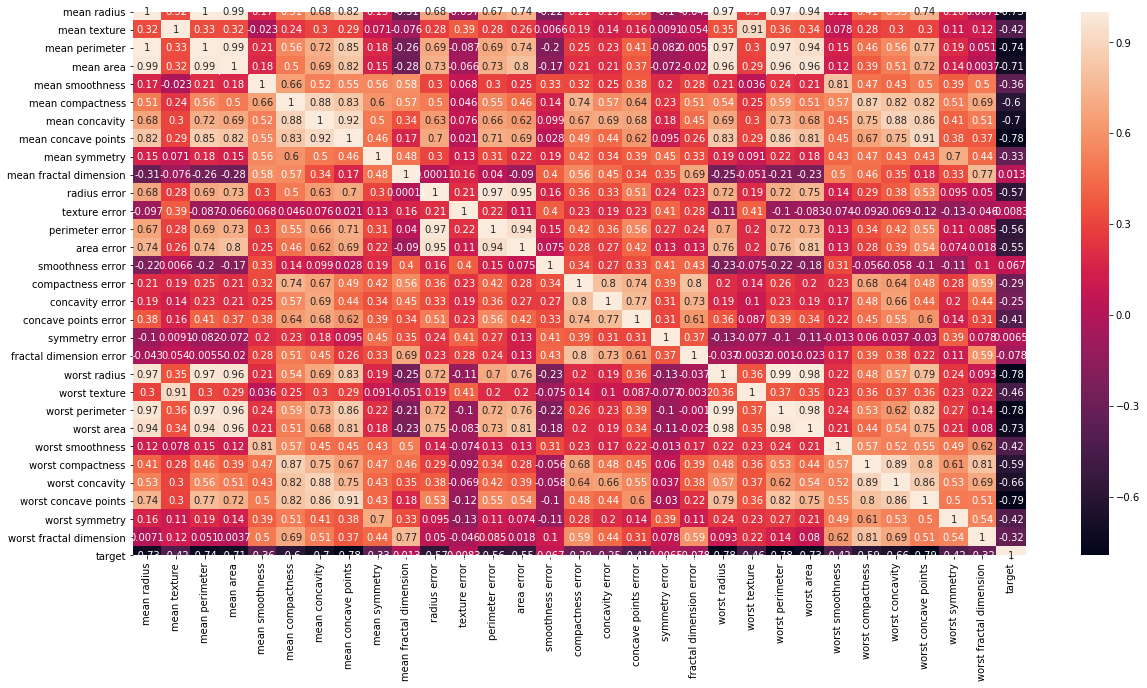

In [9]:
plt.figure(figsize=(20,10)) 
sns.heatmap(df.corr(), annot=True) 

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


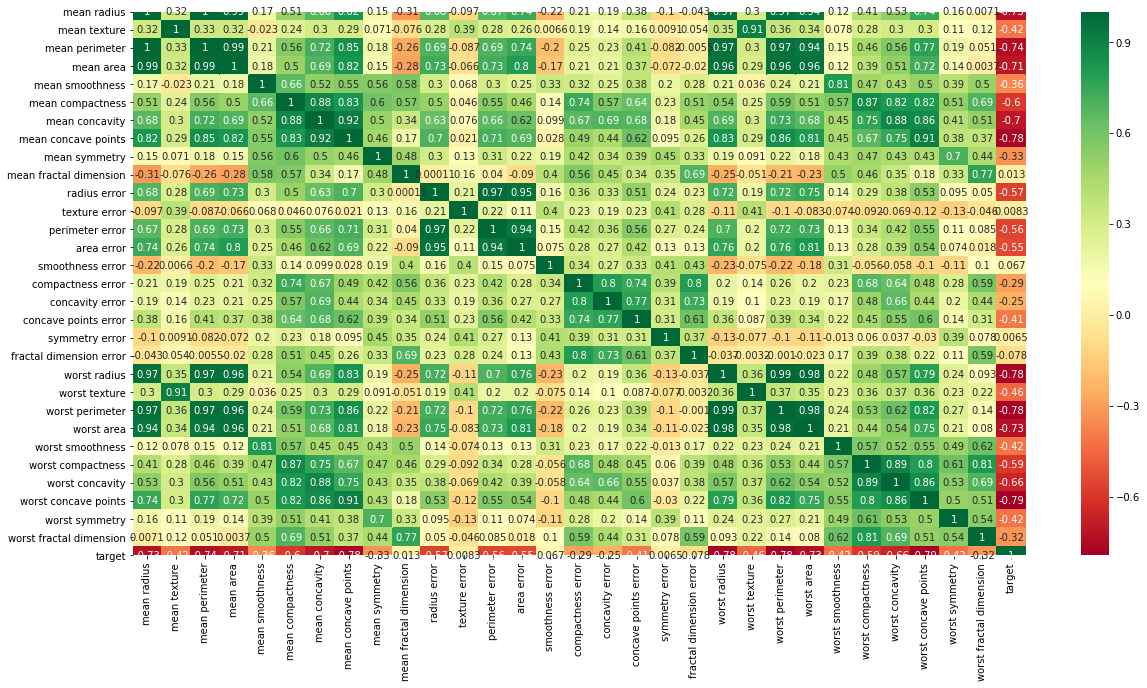

In [10]:
#Using Heatmap
plt.figure(figsize=(20,10))
c=df.corr()
sns.heatmap(c,cmap=plt.cm.RdYlGn, annot=True)
c

# From the heatmap we can see that there is a corelation within each feature of the dataframe.
# Lets check the correlation with target variable.

In [11]:
#Using Heatmap
plt.figure(figsize=(20,10))
c=df.corrwith(df['target'])
c

mean radius               -0.730029
mean texture              -0.415185
mean perimeter            -0.742636
mean area                 -0.708984
mean smoothness           -0.358560
mean compactness          -0.596534
mean concavity            -0.696360
mean concave points       -0.776614
mean symmetry             -0.330499
mean fractal dimension     0.012838
radius error              -0.567134
texture error              0.008303
perimeter error           -0.556141
area error                -0.548236
smoothness error           0.067016
compactness error         -0.292999
concavity error           -0.253730
concave points error      -0.408042
symmetry error             0.006522
fractal dimension error   -0.077972
worst radius              -0.776454
worst texture             -0.456903
worst perimeter           -0.782914
worst area                -0.733825
worst smoothness          -0.421465
worst compactness         -0.590998
worst concavity           -0.659610
worst concave points      -0

<Figure size 1440x720 with 0 Axes>

##  Lets Visualize distribution of target classes

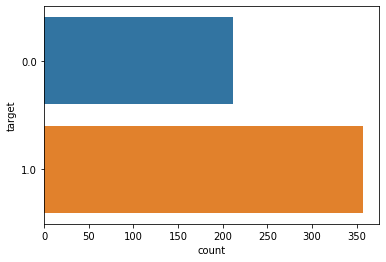

In [12]:
ax=sns.countplot(y='target',data=df)

In [13]:
df['target'].value_counts()

1.0    357
0.0    212
Name: target, dtype: int64

# We will also plot the scatter plot and check the data

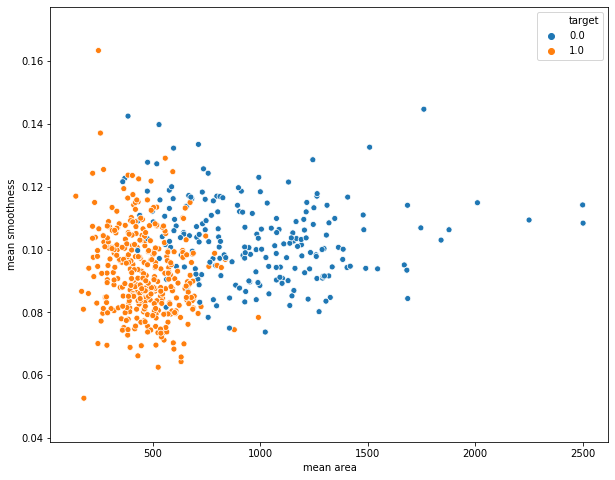

In [14]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x = 'mean area', y = 'mean smoothness', hue = 'target', data = df)

## Frame training and testing data

In [15]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

X=df.drop(columns=['target'])
y=df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.26, random_state=0)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test=scaler.transform(X_test)

## Fit a default SVM Classifier

In [16]:
from sklearn.svm import SVC

clf=SVC(kernel='linear')
clf.fit(X_train,y_train)
clf.score(X_train,y_train)
y_pred_sv=clf.predict(X_test)

print(y_pred_sv)

print("Test data accuracy : ",accuracy_score(y_test,y_pred_sv))

print("Train data accuracy : ",accuracy_score(y_train, clf.predict(X_train)))

[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1.
 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1.
 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0.
 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1.
 1. 0. 1. 0.]
Test data accuracy :  0.9662162162162162
Train data accuracy :  0.9881235154394299


## Now we will plot classification report for default SVM classifier

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("CLASSIFICATION REPORT : Test")
print(50*"*")
print(classification_report(y_test,y_pred_sv))
print(50*"*")
print("CLASSIFICATION REPORT : Train")
print(classification_report(y_train,clf.predict(X_train)))
print(50*"*")


CLASSIFICATION REPORT : Test
**************************************************
              precision    recall  f1-score   support

         0.0       0.96      0.95      0.95        55
         1.0       0.97      0.98      0.97        93

    accuracy                           0.97       148
   macro avg       0.97      0.96      0.96       148
weighted avg       0.97      0.97      0.97       148

**************************************************
CLASSIFICATION REPORT : Train
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       157
         1.0       0.99      1.00      0.99       264

    accuracy                           0.99       421
   macro avg       0.99      0.99      0.99       421
weighted avg       0.99      0.99      0.99       421

**************************************************


## Now we will plot confusion matrix for default SVM classifier

In [18]:
print("Test data confusion matrix \n",50*"*","\n", confusion_matrix(y_test,y_pred_sv))
print(50*"*")

print("Train data confusion matrix \n",50*"*","\n",confusion_matrix(y_train,clf.predict(X_train)))
print(50*"*")


Test data confusion matrix 
 ************************************************** 
 [[52  3]
 [ 2 91]]
**************************************************
Train data confusion matrix 
 ************************************************** 
 [[153   4]
 [  1 263]]
**************************************************


# Fine Tune / Search for best SVM Model [Marks:7]

## Normalize and standardize the data

# We have used scaler.transform function for normalaize and standardize in default svm classifier.

## Train SVM classifier for various parameters listed below and store the results (Accuracy, precison, recall,training time and testing time) for all the combinations in a dataframe

1. 'C': [0.1, 1, 10, 100]
2. 'gamma': [1, 0.1, 0.01, 0.001]
3. 'kernel': ['linear','rbf']

# First we will look for individual modle with Above said criteria , then we will see with combinations

In [19]:
mod_acc_tst=[]
mod_acc_trn=[]

# Model & Classification Report using C= 0.1

In [20]:
%%time
clf=SVC(C=0.1)
clf.fit(X_train,y_train)
clf.score(X_train,y_train)
y_pred_sv=clf.predict(X_test)
#print("Test data accuracy : ",accuracy_score(y_test,y_pred_sv))
#print("Train data accuracy : ",accuracy_score(y_train, clf.predict(X_train)))
mod_acc_trn.append(accuracy_score(y_train, clf.predict(X_train)))
mod_acc_tst.append(accuracy_score(y_test,y_pred_sv))
print("C =0.1 Classification Report \n", 50*"*","\n",classification_report(y_test,y_pred_sv))


C =0.1 Classification Report 
 ************************************************** 
               precision    recall  f1-score   support

         0.0       0.98      0.87      0.92        55
         1.0       0.93      0.99      0.96        93

    accuracy                           0.95       148
   macro avg       0.95      0.93      0.94       148
weighted avg       0.95      0.95      0.95       148

Wall time: 46.8 ms


# Model & Classification Report using C= 1

In [21]:
%%time
clf=SVC(C=1)
clf.fit(X_train,y_train)
clf.score(X_train,y_train)
y_pred_sv=clf.predict(X_test)
#print("Test data accuracy : ",accuracy_score(y_test,y_pred_sv))
#print("Train data accuracy : ",accuracy_score(y_train, clf.predict(X_train)))
mod_acc_trn.append(accuracy_score(y_train, clf.predict(X_train)))
mod_acc_tst.append(accuracy_score(y_test,y_pred_sv))
print("C =1 Classification Report \n", 50*"*","\n",classification_report(y_test,y_pred_sv))


C =1 Classification Report 
 ************************************************** 
               precision    recall  f1-score   support

         0.0       0.98      0.95      0.96        55
         1.0       0.97      0.99      0.98        93

    accuracy                           0.97       148
   macro avg       0.97      0.97      0.97       148
weighted avg       0.97      0.97      0.97       148

Wall time: 13.1 ms


# Model & Classification Report using C= 10

In [22]:
%%time
clf=SVC(C=10)
clf.fit(X_train,y_train)
clf.score(X_train,y_train)
y_pred_sv=clf.predict(X_test)
#print("Test data accuracy : ",accuracy_score(y_test,y_pred_sv))
#print("Train data accuracy : ",accuracy_score(y_train, clf.predict(X_train)))
mod_acc_trn.append(accuracy_score(y_train, clf.predict(X_train)))
mod_acc_tst.append(accuracy_score(y_test,y_pred_sv))
print("C =10 Classification Report \n", 50*"*","\n",classification_report(y_test,y_pred_sv))


C =10 Classification Report 
 ************************************************** 
               precision    recall  f1-score   support

         0.0       1.00      0.96      0.98        55
         1.0       0.98      1.00      0.99        93

    accuracy                           0.99       148
   macro avg       0.99      0.98      0.99       148
weighted avg       0.99      0.99      0.99       148

Wall time: 15.7 ms


# Model & Classification Report using C= 100

In [23]:
%%time
clf=SVC(C=100)
clf.fit(X_train,y_train)
clf.score(X_train,y_train)
y_pred_sv=clf.predict(X_test)
#print("Test data accuracy : ",accuracy_score(y_test,y_pred_sv))
#print("Train data accuracy : ",accuracy_score(y_train, clf.predict(X_train)))
mod_acc_trn.append(accuracy_score(y_train, clf.predict(X_train)))
mod_acc_tst.append(accuracy_score(y_test,y_pred_sv))
print("C =100 Classification Report \n", 50*"*","\n",classification_report(y_test,y_pred_sv))

C =100 Classification Report 
 ************************************************** 
               precision    recall  f1-score   support

         0.0       0.92      0.98      0.95        55
         1.0       0.99      0.95      0.97        93

    accuracy                           0.96       148
   macro avg       0.95      0.96      0.96       148
weighted avg       0.96      0.96      0.96       148

Wall time: 15.7 ms


# Model & Classification Report using kernel as Linear

In [24]:
%%time
clf=SVC(kernel='linear')
clf.fit(X_train,y_train)
clf.score(X_train,y_train)
y_pred_sv=clf.predict(X_test)
mod_acc_trn.append(accuracy_score(y_train, clf.predict(X_train)))
mod_acc_tst.append(accuracy_score(y_test,y_pred_sv))
print("LINEAR Classification Report \n", 50*"*","\n",classification_report(y_test,y_pred_sv))


LINEAR Classification Report 
 ************************************************** 
               precision    recall  f1-score   support

         0.0       0.96      0.95      0.95        55
         1.0       0.97      0.98      0.97        93

    accuracy                           0.97       148
   macro avg       0.97      0.96      0.96       148
weighted avg       0.97      0.97      0.97       148

Wall time: 15.5 ms


# Model & Classification Report using kernel as RBF

In [25]:
%%time
clf=SVC(kernel='rbf')
clf.fit(X_train,y_train)
clf.score(X_train,y_train)
y_pred_sv=clf.predict(X_test)
mod_acc_trn.append(accuracy_score(y_train, clf.predict(X_train)))
mod_acc_tst.append(accuracy_score(y_test,y_pred_sv))
print("RBF Classification Report \n", 50*"*","\n",classification_report(y_test,y_pred_sv))


RBF Classification Report 
 ************************************************** 
               precision    recall  f1-score   support

         0.0       0.98      0.95      0.96        55
         1.0       0.97      0.99      0.98        93

    accuracy                           0.97       148
   macro avg       0.97      0.97      0.97       148
weighted avg       0.97      0.97      0.97       148

Wall time: 15.5 ms


# Model & Classification Report using gamma=1

In [26]:
%%time
clf=SVC(gamma=1)
clf.fit(X_train,y_train)
clf.score(X_train,y_train)
y_pred_sv=clf.predict(X_test)
mod_acc_trn.append(accuracy_score(y_train, clf.predict(X_train)))
mod_acc_tst.append(accuracy_score(y_test,y_pred_sv))
print("Gamma =1 Classification Report \n", 50*"*","\n",classification_report(y_test,y_pred_sv))


Gamma =1 Classification Report 
 ************************************************** 
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        55
         1.0       0.63      1.00      0.77        93

    accuracy                           0.63       148
   macro avg       0.31      0.50      0.39       148
weighted avg       0.39      0.63      0.48       148

Wall time: 78 ms


# Model & Classification Report using gamma=0.1

In [27]:
%%time
clf=SVC(gamma=0.1)
clf.fit(X_train,y_train)
clf.score(X_train,y_train)
y_pred_sv=clf.predict(X_test)
mod_acc_trn.append(accuracy_score(y_train, clf.predict(X_train)))
mod_acc_tst.append(accuracy_score(y_test,y_pred_sv))
print("Gamma =0.1 Classification Report \n", 50*"*","\n",classification_report(y_test,y_pred_sv))


Gamma =0.1 Classification Report 
 ************************************************** 
               precision    recall  f1-score   support

         0.0       0.95      0.95      0.95        55
         1.0       0.97      0.97      0.97        93

    accuracy                           0.96       148
   macro avg       0.96      0.96      0.96       148
weighted avg       0.96      0.96      0.96       148

Wall time: 31.2 ms


# Model & Classification Report using gamma=0.01

In [28]:
%%time
clf=SVC(gamma=0.01)
clf.fit(X_train,y_train)
clf.score(X_train,y_train)
y_pred_sv=clf.predict(X_test)
#print("Test data accuracy : ",accuracy_score(y_test,y_pred_sv))
#print("Train data accuracy : ",accuracy_score(y_train, clf.predict(X_train)))
mod_acc_trn.append(accuracy_score(y_train, clf.predict(X_train)))
mod_acc_tst.append(accuracy_score(y_test,y_pred_sv))
print("Gamma =0.01 Classification Report \n", 50*"*","\n",classification_report(y_test,y_pred_sv))


Gamma =0.01 Classification Report 
 ************************************************** 
               precision    recall  f1-score   support

         0.0       0.98      0.91      0.94        55
         1.0       0.95      0.99      0.97        93

    accuracy                           0.96       148
   macro avg       0.96      0.95      0.96       148
weighted avg       0.96      0.96      0.96       148

Wall time: 15.5 ms


# Model & Classification Report using gamma=0.001

In [29]:
%%time
clf=SVC(gamma=0.001)
clf.fit(X_train,y_train)
clf.score(X_train,y_train)
y_pred_sv=clf.predict(X_test)
#print("Test data accuracy : ",accuracy_score(y_test,y_pred_sv))
#print("Train data accuracy : ",accuracy_score(y_train, clf.predict(X_train)))
mod_acc_trn.append(accuracy_score(y_train, clf.predict(X_train)))
mod_acc_tst.append(accuracy_score(y_test,y_pred_sv))
print("Gamma =0.001 Classification Report \n", 50*"*","\n",classification_report(y_test,y_pred_sv))


Gamma =0.001 Classification Report 
 ************************************************** 
               precision    recall  f1-score   support

         0.0       1.00      0.85      0.92        55
         1.0       0.92      1.00      0.96        93

    accuracy                           0.95       148
   macro avg       0.96      0.93      0.94       148
weighted avg       0.95      0.95      0.94       148

Wall time: 31.3 ms


In [30]:
print(50*"*"," Train Accuracy",50*"*")
print (mod_acc_trn)
print(50*"*"," Test Accuracy",50*"*")
print (mod_acc_tst)


**************************************************  Train Accuracy **************************************************
[0.9524940617577197, 0.9833729216152018, 0.9881235154394299, 1.0, 0.9881235154394299, 0.9833729216152018, 1.0, 0.9857482185273159, 0.9833729216152018, 0.9501187648456056]
**************************************************  Test Accuracy **************************************************
[0.9459459459459459, 0.972972972972973, 0.9864864864864865, 0.9594594594594594, 0.9662162162162162, 0.972972972972973, 0.6283783783783784, 0.9594594594594594, 0.9594594594594594, 0.9459459459459459]


# In the above we looked at the accuracy ,precision, recall and f1 score for each independently. Now lets take a look at the combination of each of them

In [31]:
import array as array
import datetime
kernel_name=['linear','rbf']
C_val = [0.1,1,10,100]
gamma_val=[1,0.1,0.01,0.001]

In [32]:
print('| Kernel | C | Gamma | Accuracy_Score | Time Taken')
print('|--|--|--|--|--|')

for k in enumerate(kernel_name):
    for i in C_val: 
        for j in gamma_val:
            start_time = datetime.datetime.now()
            clf = SVC(C=i, kernel=k[1], gamma= j)
            clf.fit(X_train, y_train)
            end_time = datetime.datetime.now()
            time_to_fit = end_time - start_time
            start_time_pred = datetime.datetime.now()
            y_pred = clf.predict(X_test)
            end_time_pred = datetime.datetime.now()
            time_to_predict = end_time_pred - start_time_pred
            print(k[1],' | ', i,' | ', j, ' | ' , round(accuracy_score(y_test,y_pred),2), ' | ', time_to_predict.total_seconds())

| Kernel | C | Gamma | Accuracy_Score | Time Taken
|--|--|--|--|--|
linear  |  0.1  |  1  |  0.97  |  0.0
linear  |  0.1  |  0.1  |  0.97  |  0.0
linear  |  0.1  |  0.01  |  0.97  |  0.0
linear  |  0.1  |  0.001  |  0.97  |  0.0
linear  |  1  |  1  |  0.97  |  0.0
linear  |  1  |  0.1  |  0.97  |  0.0
linear  |  1  |  0.01  |  0.97  |  0.0
linear  |  1  |  0.001  |  0.97  |  0.0
linear  |  10  |  1  |  0.94  |  0.0
linear  |  10  |  0.1  |  0.94  |  0.0
linear  |  10  |  0.01  |  0.94  |  0.0
linear  |  10  |  0.001  |  0.94  |  0.0
linear  |  100  |  1  |  0.95  |  0.0
linear  |  100  |  0.1  |  0.95  |  0.0
linear  |  100  |  0.01  |  0.95  |  0.0
linear  |  100  |  0.001  |  0.95  |  0.0
rbf  |  0.1  |  1  |  0.63  |  0.0
rbf  |  0.1  |  0.1  |  0.93  |  0.0
rbf  |  0.1  |  0.01  |  0.95  |  0.0
rbf  |  0.1  |  0.001  |  0.77  |  0.0
rbf  |  1  |  1  |  0.63  |  0.0
rbf  |  1  |  0.1  |  0.96  |  0.0
rbf  |  1  |  0.01  |  0.96  |  0.0
rbf  |  1  |  0.001  |  0.95  |  0.0
rbf  |  10

# Now We will see Combination of various  parameters like C, Gamma, type of kernel and their accuracy score , time taken

| Kernel | C | Gamma | Accuracy_Score | Time Taken
|--|--|--|--|--|
|linear  |  0.1  |  1  |  0.97  |  0.0|
|linear  |  0.1  |  0.1  |  0.97  |  0.0|
|linear  |  0.1  |  0.01  |  0.97  |  0.0|
|linear  |  0.1  |  0.001  |  0.97  |  0.0|
|linear  |  1  |  1  |  0.97  |  0.0|
|linear  |  1  |  0.1  |  0.97  |  0.0|
|linear  |  1  |  0.01  |  0.97  |  0.0|
|linear  |  1  |  0.001  |  0.97  |  0.000431|
|linear  |  10  |  1  |  0.94  |  0.0|
|linear  |  10  |  0.1  |  0.94  |  0.0|
|linear  |  10  |  0.01  |  0.94  |  0.0|
|linear  |  10  |  0.001  |  0.94  |  0.0|
|linear  |  100  |  1  |  0.95  |  0.0|
|linear  |  100  |  0.1  |  0.95  |  0.0|
|linear  |  100  |  0.01  |  0.95  |  0.0|
|linear  |  100  |  0.001  |  0.95  |  0.0|
|rbf  |  0.1  |  1  |  0.63  |  0.015667|
|rbf  |  0.1  |  0.1  |  0.93  |  0.015625|
|rbf  |  0.1  |  0.01  |  0.95  |  0.0|
|rbf  |  0.1  |  0.001  |  0.77  |  0.0|
|rbf  |  1  |  1  |  0.63  |  0.015626|
|rbf  |  1  |  0.1  |  0.96  |  0.0|
|rbf  |  1  |  0.01  |  0.96  |   0.015617|
|rbf  |  1  |  0.001  |  0.95  |  0.0|
|rbf  |  10  |  1  |  0.63  |  0.015623|
|rbf  |  10  |  0.1  |  0.97  |  0.01561|
|rbf  |  10  |  0.01  |  0.99  |  0.0|
|rbf  |  10  |  0.001  |  0.96  |  0.0|
|rbf  |  100  |  1  |  0.63  |  0.015628|
|rbf  |  100  |  0.1  |  0.97  |  0.0|
|rbf  |  100  |  0.01  |  0.96  |  0.0|
|rbf  |  100  |  0.001  |  0.98  |  0.0|

# Final Model [Marks:1]

## Final model will be which  that gives the best recall and reasonable precision and F1 Score and the fastest prediction time. 

**Select the parameters and retrain the final model and plot its confusion matrix**

LINEAR Classification Report 
 ************************************************** 
               precision    recall  f1-score   support

         0.0       0.96      0.95      0.95        55
         1.0       0.97      0.98      0.97        93

    accuracy                           0.97       148
  
RBF Classification Report 
 ************************************************** 
               precision    recall  f1-score   support

         0.0       0.98      0.95      0.96        55
         1.0       0.97      0.99      0.98        93

    accuracy                           0.97       148

Gamma =1 Classification Report 
 ************************************************** 
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        55
         1.0       0.63      1.00      0.77        93

    accuracy                           0.63       148
  
Gamma =0.1 Classification Report 
 ************************************************** 
               precision    recall  f1-score   support

         0.0       0.95      0.95      0.95        55
         1.0       0.97      0.97      0.97        93

    accuracy                           0.96       148
  
Gamma =0.001 Classification Report 
 ************************************************** 
               precision    recall  f1-score   support

         0.0       1.00      0.85      0.92        55
         1.0       0.92      1.00      0.96        93

    accuracy                           0.95       148

C =0.1 Classification Report 
 ************************************************** 
               precision    recall  f1-score   support

         0.0       0.98      0.87      0.92        55
         1.0       0.93      0.99      0.96        93

    accuracy                           0.95       148
 
C =1 Classification Report 
 ************************************************** 
               precision    recall  f1-score   support

         0.0       0.98      0.95      0.96        55
         1.0       0.97      0.99      0.98        93

    accuracy                           0.97       148

C =10 Classification Report 
 ************************************************** 
               precision    recall  f1-score   support

         0.0       1.00      0.96      0.98        55
         1.0       0.98      1.00      0.99        93

    accuracy                           0.99       148
   
C =100 Classification Report 
 ************************************************** 
               precision    recall  f1-score   support

         0.0       0.92      0.98      0.95        55
         1.0       0.99      0.95      0.97        93

    accuracy                           0.96       148



# From the above accuracy, timeline , precision, F1, recall and prediction time.Below is the observation:

# Best accuracy is driven by :C=10, with gamma =0.01 and kernel :- rbf

# Fastest Prediction Time : Linear : 0.000431 ms. ( rest all is Higher)


# However with the combination of all 3, the best is kernel= rbf  C= 10  ,gamma= 0.01 with accuracy of  0.99 . So lets Model the final Model along with accuracy classification and confusion matrix


In [33]:
clf=SVC(kernel= 'rbf', C=10 ,gamma= 0.01)
clf.fit(X_train,y_train)
clf.score(X_train,y_train)
y_pred_sv=clf.predict(X_test)
print("Test data accuracy : ",accuracy_score(y_test,y_pred_sv))
print("Train data accuracy : ",accuracy_score(y_train, clf.predict(X_train)))
print("Classification Report  on Test Data \n", 50*"*","\n",classification_report(y_test,y_pred_sv))
print("Confusion Matrix on Test Data \n", 50*"*", "\n", confusion_matrix(y_test,y_pred_sv))
print(5,0*"*","Classification Report on Train Data \n", 50*"*","\n",classification_report(y_train,clf.predict(X_train)))
print(50*"*","Confusion Matrix on Train Data \n", 50*"*", "\n", confusion_matrix(y_train,clf.predict(X_train)))

Test data accuracy :  0.9864864864864865
Train data accuracy :  0.9857482185273159
Classification Report  on Test Data 
 ************************************************** 
               precision    recall  f1-score   support

         0.0       0.98      0.98      0.98        55
         1.0       0.99      0.99      0.99        93

    accuracy                           0.99       148
   macro avg       0.99      0.99      0.99       148
weighted avg       0.99      0.99      0.99       148

Confusion Matrix on Test Data 
 ************************************************** 
 [[54  1]
 [ 1 92]]
5  Classification Report on Train Data 
 ************************************************** 
               precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       157
         1.0       0.98      1.00      0.99       264

    accuracy                           0.99       421
   macro avg       0.99      0.98      0.98       421
weighted avg       0.99      